# Python File for Group 7 
# Linkedin Dataset Project Spring 2024
# ISYS 812

### Loading the required libraries

In [1]:
import pandas as pd
import numpy as np
from numpy import NaN, NAN , nan
import matplotlib.pyplot as plt
import re
import seaborn as sns
import geopandas as gpd

### Loading and combining the datasets

In [2]:

usa = pd.read_csv('linkedin-jobs-usa.csv')
africa = pd.read_csv('linkedin-jobs-africa.csv')
canada = pd.read_csv('linkedin-jobs-canada.csv')

MainDataSet = pd.concat ([usa, africa, canada], ignore_index=True)

MainDataSet.head()

,title,company,description,onsite_remote,salary,location,criteria,posted_date,link
0,Data Analyst - Recent Graduate,PayPal,"At PayPal (NASDAQ: PYPL), we believe that ever...",onsite,NaN,Buffalo-Niagara Falls Area,"[{'Seniority level': 'Not Applicable'}, {'Empl...",2022-11-22,https://www.linkedin.com/jobs/view/data-analys...
1,Data Analyst - Recent Graduate,PayPal,"At PayPal (NASDAQ: PYPL), we believe that ever...",onsite,NaN,"San Jose, CA","[{'Seniority level': 'Not Applicable'}, {'Empl...",2022-11-22,https://www.linkedin.com/jobs/view/data-analys...
2,Data Analyst,PayPal,"At PayPal (NASDAQ: PYPL), we believe that ever...",onsite,NaN,"Texas, United States","[{'Seniority level': 'Not Applicable'}, {'Empl...",2022-11-17,https://www.linkedin.com/jobs/view/data-analys...
3,Data Analyst,PayPal,"At PayPal (NASDAQ: PYPL), we believe that ever...",onsite,NaN,"Illinois, United States","[{'Seniority level': 'Not Applicable'}, {'Empl...",2022-11-17,https://www.linkedin.com/jobs/view/data-analys...
4,Entry-Level Data Analyst,The Federal Savings Bank,"The Federal Savings Bank, a national bank and ...",onsite,NaN,"Chicago, IL","[{'Seniority level': 'Entry level'}, {'Employm...",2022-11-17,https://www.linkedin.com/jobs/view/entry-level...


In [3]:
# Dropping the salary and link columns
MainDataSet.drop(columns=['salary','link'], inplace=True)

### Criteria column

In [4]:
# This code is to delete the criteria column and seperate Seniority level, Job funciton, and Industries into their respective column

def extract_criteria(criteria):
    seniority_level = None
    job_function = None
    industries = None

    for detail in eval(criteria):
        if 'Seniority level' in detail:
            seniority_level = detail['Seniority level']
        if 'Job function' in detail:
            job_function = detail['Job function']
        if 'Industries' in detail:
            industries = detail['Industries']

    return seniority_level, job_function, industries

MainDataSet[['Seniority level', 'Job function', 'Industries']] = MainDataSet['criteria'].apply(extract_criteria).apply(pd.Series)

MainDataSet.drop('criteria', axis=1, inplace=True)

In [5]:
MainDataSet.head()

,title,company,description,onsite_remote,location,posted_date,Seniority level,Job function,Industries
0,Data Analyst - Recent Graduate,PayPal,"At PayPal (NASDAQ: PYPL), we believe that ever...",onsite,Buffalo-Niagara Falls Area,2022-11-22,Not Applicable,Information Technology,"Software Development, Technology, Information ..."
1,Data Analyst - Recent Graduate,PayPal,"At PayPal (NASDAQ: PYPL), we believe that ever...",onsite,"San Jose, CA",2022-11-22,Not Applicable,Information Technology,"Software Development, Technology, Information ..."
2,Data Analyst,PayPal,"At PayPal (NASDAQ: PYPL), we believe that ever...",onsite,"Texas, United States",2022-11-17,Not Applicable,Information Technology,"Software Development, Technology, Information ..."
3,Data Analyst,PayPal,"At PayPal (NASDAQ: PYPL), we believe that ever...",onsite,"Illinois, United States",2022-11-17,Not Applicable,Information Technology,"Software Development, Technology, Information ..."
4,Entry-Level Data Analyst,The Federal Savings Bank,"The Federal Savings Bank, a national bank and ...",onsite,"Chicago, IL",2022-11-17,Entry level,Information Technology,Savings Institutions


### Skills

In [6]:
# Scraping skills from the job description
top_skills = ['sql', ' r ', 'python', 'matlab', 'excel', 'tableau', 'power bi', 'java', 'data visualization', 'data mining', 'statistics', 'machine learning', 'data cleaning', 'data manipulation', 'spark', 'hadoop', 'google analytics', 'aws', 'machine learning', 'qlik', 'data modeling']
for i in top_skills:
    skill = []
    for desc in MainDataSet['description']:
        if i in desc.lower():
            skill.append(1)
        else:
            skill.append(0)
    MainDataSet[i] = skill

MainDataSet.head()

,title,company,description,onsite_remote,location,posted_date,Seniority level,Job function,Industries,sql,...,statistics,machine learning,data cleaning,data manipulation,spark,hadoop,google analytics,aws,qlik,data modeling
0,Data Analyst - Recent Graduate,PayPal,"At PayPal (NASDAQ: PYPL), we believe that ever...",onsite,Buffalo-Niagara Falls Area,2022-11-22,Not Applicable,Information Technology,"Software Development, Technology, Information ...",1,...,1,0,0,0,0,1,0,0,0,0
1,Data Analyst - Recent Graduate,PayPal,"At PayPal (NASDAQ: PYPL), we believe that ever...",onsite,"San Jose, CA",2022-11-22,Not Applicable,Information Technology,"Software Development, Technology, Information ...",1,...,1,0,0,0,0,1,0,0,0,0
2,Data Analyst,PayPal,"At PayPal (NASDAQ: PYPL), we believe that ever...",onsite,"Texas, United States",2022-11-17,Not Applicable,Information Technology,"Software Development, Technology, Information ...",1,...,0,0,0,0,0,1,0,0,0,0
3,Data Analyst,PayPal,"At PayPal (NASDAQ: PYPL), we believe that ever...",onsite,"Illinois, United States",2022-11-17,Not Applicable,Information Technology,"Software Development, Technology, Information ...",1,...,0,0,0,0,0,1,0,0,0,0
4,Entry-Level Data Analyst,The Federal Savings Bank,"The Federal Savings Bank, a national bank and ...",onsite,"Chicago, IL",2022-11-17,Entry level,Information Technology,Savings Institutions,1,...,0,0,0,0,0,0,0,0,0,0


## Visualizations

### Top Skills Mentioned in Job Descriptions

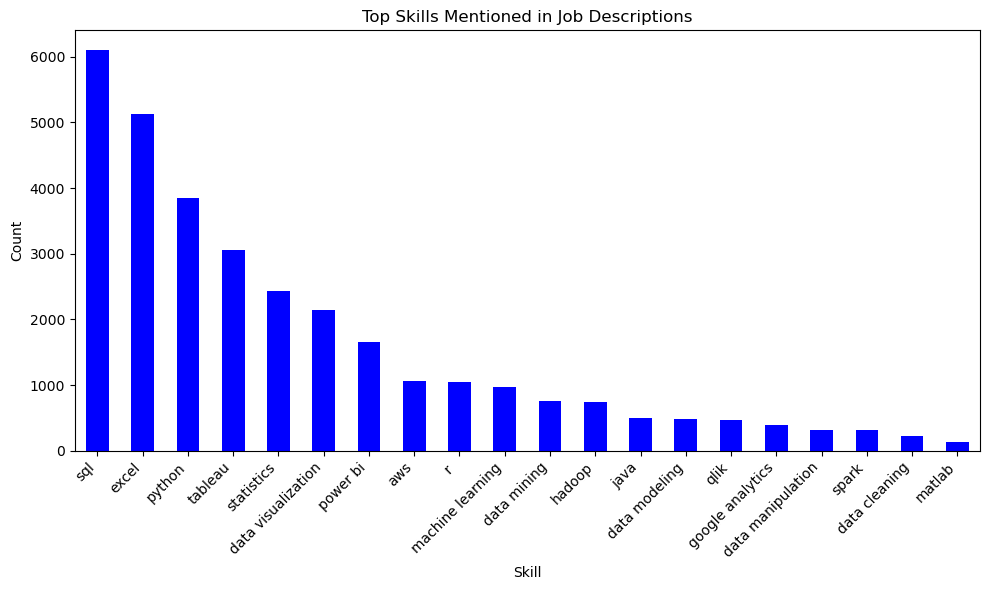

In [7]:
skill_counts = {}


for skill in top_skills:
    count = 0
    for description in MainDataSet['description']:
        if skill in description.lower():
            count += 1
    skill_counts[skill] = count

skill_series = pd.Series(skill_counts)


plt.figure(figsize=(10, 6))
skill_series.sort_values(ascending=False).plot(kind='bar', color='blue')
plt.title('Top Skills Mentioned in Job Descriptions')
plt.xlabel('Skill')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Top Skills by Seniority Level

In [8]:
MainDataSet['Seniority level'].value_counts()

Seniority level
Entry level         2591
Mid-Senior level    2376
Associate           1441
Not Applicable      1182
Internship            41
Executive              1
Name: count, dtype: int64

In [9]:
skills = MainDataSet[['Seniority level','sql',
       ' r ', 'python', 'matlab', 'excel', 'tableau', 'power bi',
       'java', 'data visualization', 'data mining', 'statistics',
       'machine learning', 'data cleaning', 'data manipulation', 'spark',
       'hadoop', 'google analytics', 'aws', 'qlik', 'data modeling']]

In [10]:
skills_totals = skills.groupby('Seniority level').sum().reset_index()
skills_totals

,Seniority level,sql,r,python,matlab,excel,tableau,power bi,java,data visualization,...,statistics,machine learning,data cleaning,data manipulation,spark,hadoop,google analytics,aws,qlik,data modeling
0,Associate,811,15,422,49,1008,611,197,74,415,...,349,92,33,37,37,4,110,75,55,36
1,Entry level,1882,407,1210,45,1726,792,634,133,497,...,735,329,44,97,15,47,165,344,198,212
2,Executive,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,Internship,0,0,2,0,41,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
4,Mid-Senior level,1785,123,1098,39,1239,951,515,64,762,...,705,447,72,106,119,135,77,422,164,163
5,Not Applicable,1055,411,752,0,709,393,80,184,182,...,392,64,72,75,64,555,35,79,0,37


In [11]:
top_skills = pd.DataFrame()
for index, row in skills_totals.iterrows():
    skills = row[1:].sort_values(ascending=False)[:10]
    new_row = pd.DataFrame({
        'Seniority level': [row['Seniority level']],
        'Top Skills': [list(skills.index)],
        'Values': [list(skills.values)]
    })
    top_skills = pd.concat([top_skills, new_row], ignore_index=True)

In [12]:
top_skills = top_skills[~top_skills['Seniority level'].isin(['Executive', 'Internship', 'Not Applicable'])].reset_index()
top_skills.drop(columns=['index'], inplace=True)

/var/folders/y7/pl60qfk54pl9nf8np6cks6c80000gn/T/ipykernel_12769/3701526727.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(skills, rotation=45, ha='right')
/var/folders/y7/pl60qfk54pl9nf8np6cks6c80000gn/T/ipykernel_12769/3701526727.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(skills, rotation=45, ha='right')
/var/folders/y7/pl60qfk54pl9nf8np6cks6c80000gn/T/ipykernel_12769/3701526727.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(skills, rotation=45, ha='right')


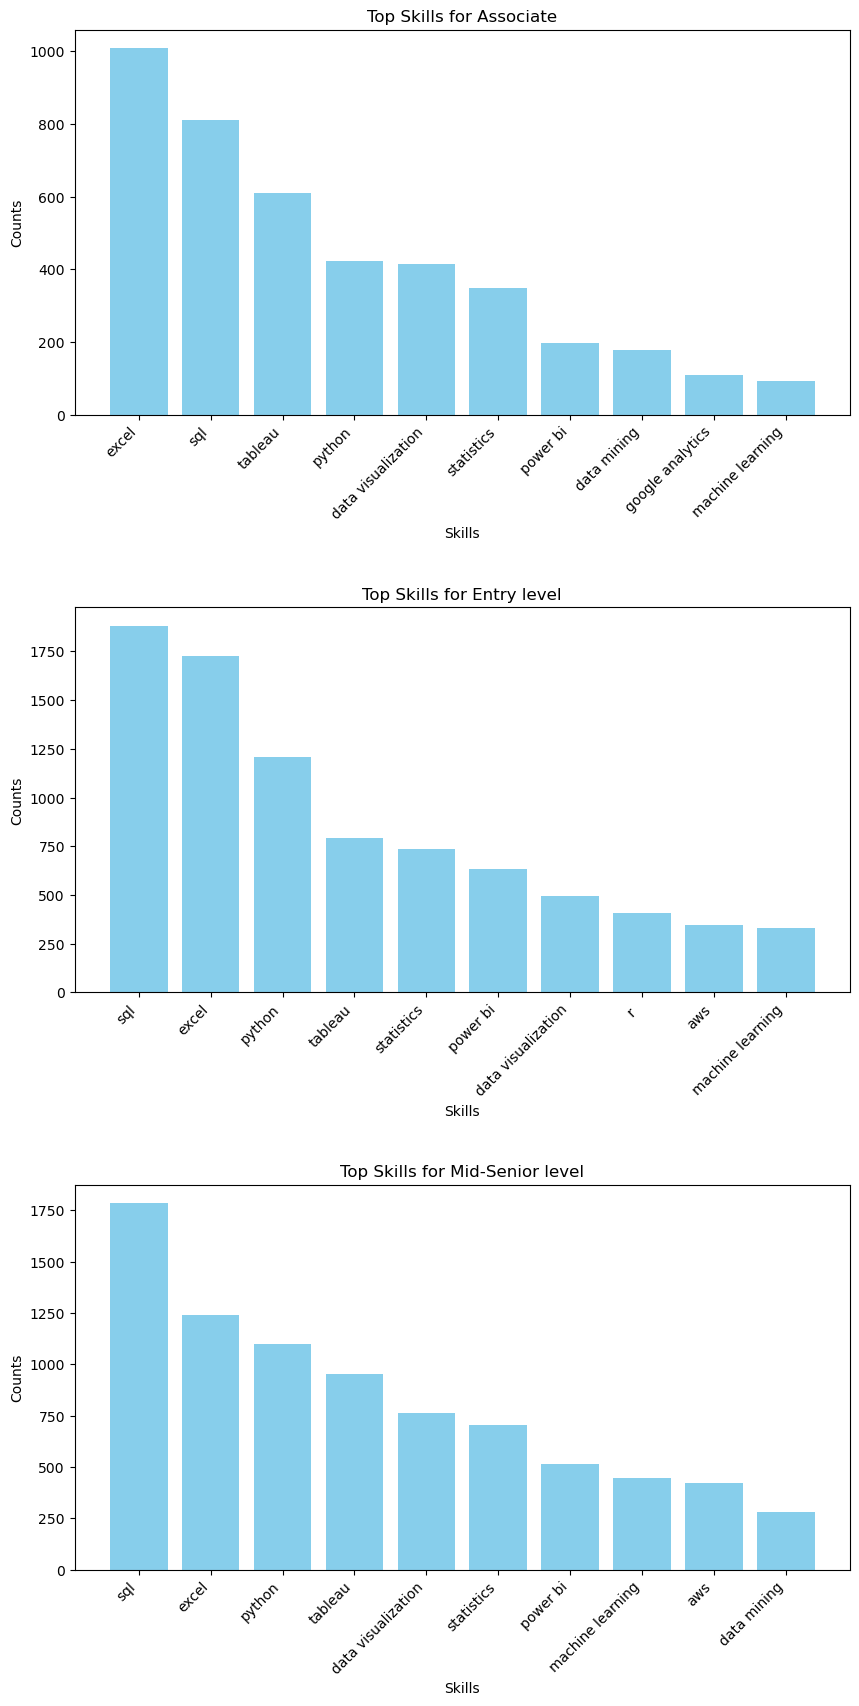

In [13]:
fig, axes = plt.subplots(nrows=len(top_skills), figsize=(10, 20))
fig.subplots_adjust(hspace=0.5)

for i, row in top_skills.iterrows():
    ax = axes[i]
    skills = row['Top Skills']
    values = row['Values']
    ax.bar(skills, values, color='skyblue')
    ax.set_title(f"Top Skills for {row['Seniority level']}")
    ax.set_xlabel('Skills')
    ax.set_ylabel('Counts')
    ax.set_xticklabels(skills, rotation=45, ha='right')

plt.show()

### Distribution of Onsite/Hybrid vs Remote Jobs in the US

In [14]:
def is_onsite_hybrid(value):
    if 'onsite' in value.lower() or 'hybrid' in value.lower():
        return 1
    else:
        return 0

def is_remote(value):
    if 'remote' in value.lower():
        return 1
    else:
        return 0


usa['onsite_hybrid'] = usa['onsite_remote'].apply(is_onsite_hybrid)
usa['remote'] = usa['onsite_remote'].apply(is_remote)


usa.drop('onsite_remote', axis=1, inplace=True)


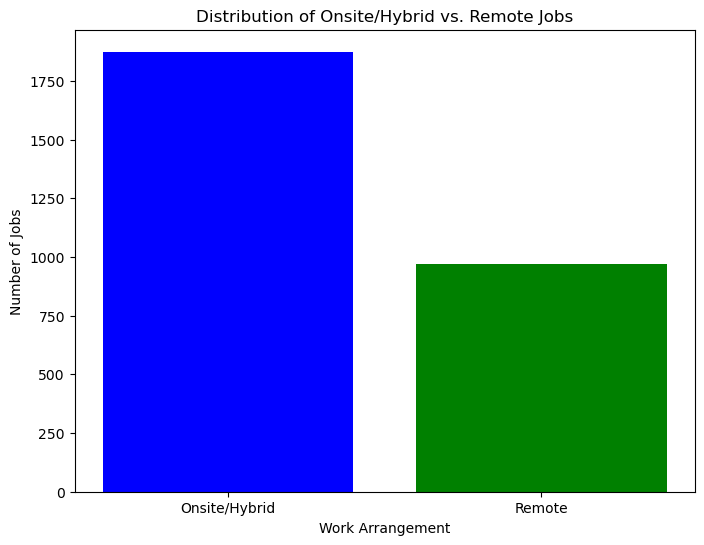

In [15]:
# This code is to graph onsite_hybrid and remote as a bar graph

import matplotlib.pyplot as plt

onsite_hybrid_count = usa['onsite_hybrid'].sum()
remote_count = usa['remote'].sum()

labels = ['Onsite/Hybrid', 'Remote']
counts = [onsite_hybrid_count, remote_count]

plt.figure(figsize=(8, 6))
plt.bar(labels, counts, color=['blue', 'green'])
plt.title('Distribution of Onsite/Hybrid vs. Remote Jobs')
plt.xlabel('Work Arrangement')
plt.ylabel('Number of Jobs')
plt.show()

### 

In [16]:
#This code is to create onsite_hybrid and remote columns from the onsite_remote column

def is_onsite_hybrid(value):
    if 'onsite' in value.lower() or 'hybrid' in value.lower():
        return 1
    else:
        return 0

def is_remote(value):
    if 'remote' in value.lower():
        return 1
    else:
        return 0


africa['onsite_hybrid'] = africa['onsite_remote'].apply(is_onsite_hybrid)
africa['remote'] = africa['onsite_remote'].apply(is_remote)


africa.drop('onsite_remote', axis=1, inplace=True)

In [17]:
africa_shapefile = gpd.read_file('afr_g2014_2013_0.shp')


DriverError: afr_g2014_2013_0.shp: No such file or directory

In [ ]:
# Merge the counts with the shapefile using 'ADM0_NAME' as the country identifier
africa_shapefile = africa_shapefile.merge(country_onsite_counts, how='left', left_on='ADM0_NAME', right_index=True)
africa_shapefile = africa_shapefile.merge(country_remote_counts, how='left', left_on='ADM0_NAME', right_index=True)


<Figure size 1200x600 with 0 Axes>

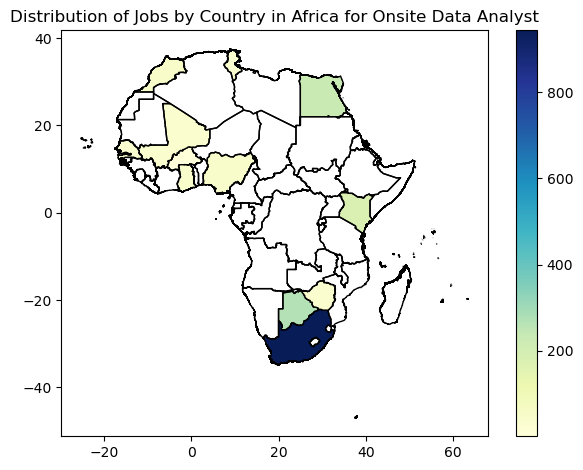

In [ ]:
# Group 'Johannesburg Metropolitan Area' into 'South Africa'
# Assuming 'africa' DataFrame is loaded and contains a 'country' column
africa['country'] = africa['country'].replace('Johannesburg Metropolitan Area', 'South Africa')

# Calculate counts of true values for onsite_hybrid column by country
country_onsite_counts = africa.groupby('country')['onsite_hybrid'].sum()

# Merge the counts with the shapefile
africa_shapefile = africa_shapefile.merge(country_onsite_counts, how='left', left_on='ADM0_NAME', right_index=True)

# Plot choropleth map of onsite/hybrid job distribution by country
plt.figure(figsize=(12, 6))
africa_shapefile.plot(column='onsite_hybrid', cmap='YlGnBu', legend=True, missing_kwds={'color': 'none'}, edgecolor='black')
plt.title('Distribution of Jobs by Country in Africa for Onsite Data Analyst')

plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

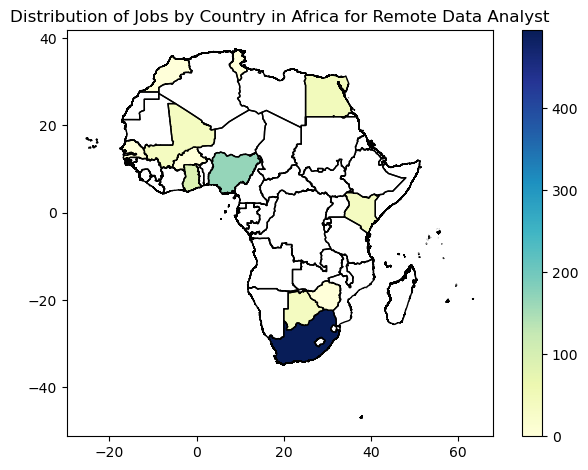

In [ ]:
plt.figure(figsize=(12, 6))
africa_shapefile.plot(column='remote', cmap='YlGnBu', legend=True, missing_kwds={'color': 'none'}, edgecolor='black')
plt.title('Distribution of Jobs by Country in Africa for Remote Data Analyst')

plt.tight_layout()
plt.show()

### Canada

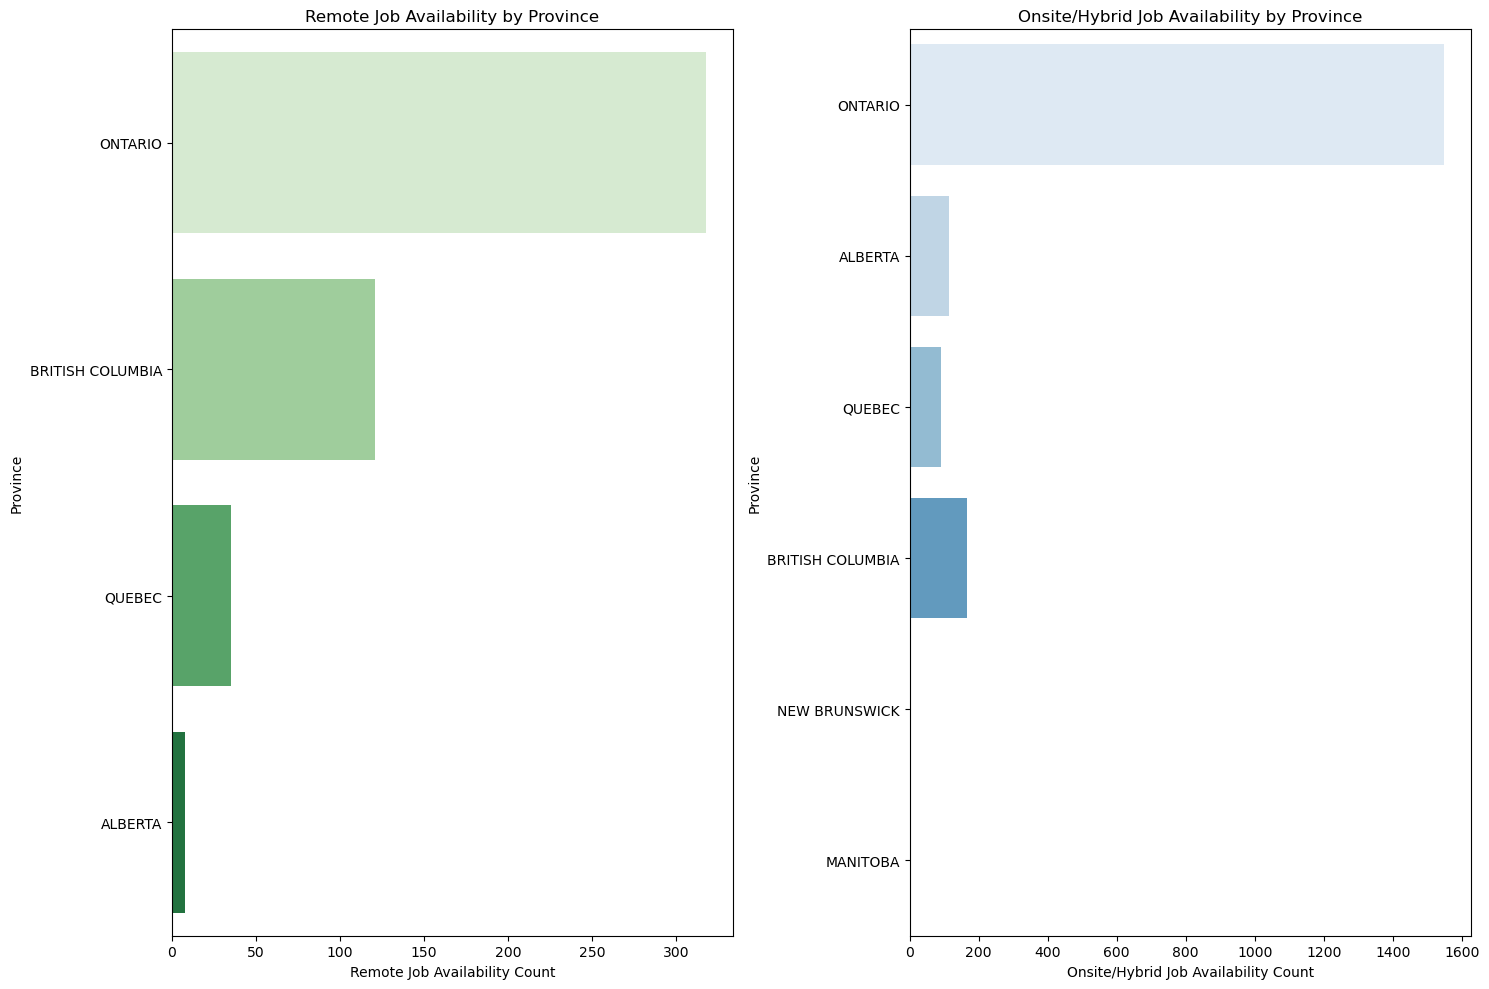

Job Counts by Province:
                  onsite1  remote1
Province                          
ALBERTA               113        8
BRITISH COLUMBIA      166      121
MANITOBA                1        0
NEW BRUNSWICK           3        0
ONTARIO              1549      318
QUEBEC                 90       35


In [ ]:
# Define functions to create dummy variables
def is_onsite_hybrid(value):
    if 'onsite' in value.lower() or 'hybrid' in value.lower():
        return 1
    else:
        return 0  # Return 0 when neither 'onsite' nor 'hybrid' is found

def is_remote(value):
    if 'remote' in value.lower():
        return 1
    else:
        return 0  # Return 0 when 'remote' is not found

# Create dummy variables
canada['onsite1'] = canada['onsite_remote'].apply(is_onsite_hybrid)
canada['remote1'] = canada['onsite_remote'].apply(is_remote)

# Convert 'location' column to uppercase
canada['location'] = canada['location'].str.upper()

# Extract the province from the 'location' column
canada['Province'] = canada['location'].str.split(', ').str[-2]

# Replace "Greater Toronto Area" with "Ontario"
canada['Province'] = canada['Province'].replace('GREATER TORONTO AREA', 'ONTARIO')

# Plotting
plt.figure(figsize=(15, 10))

# Plot Remote jobs
plt.subplot(1, 2, 1)
sns.countplot(y='Province', data=canada[canada['remote1'] == 1], palette='Greens')
plt.xlabel('Remote Job Availability Count')
plt.ylabel('Province')
plt.title('Remote Job Availability by Province')

# Plot Onsite/Hybrid jobs
plt.subplot(1, 2, 2)
sns.countplot(y='Province', data=canada[canada['onsite1'] == 1], palette='Blues')
plt.xlabel('Onsite/Hybrid Job Availability Count')
plt.ylabel('Province')
plt.title('Onsite/Hybrid Job Availability by Province')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

# Count onsite and remote jobs by province
province_counts = canada.groupby('Province')[['onsite1', 'remote1']].sum()

# Print the counts
print("Job Counts by Province:")
print(province_counts)


### USA

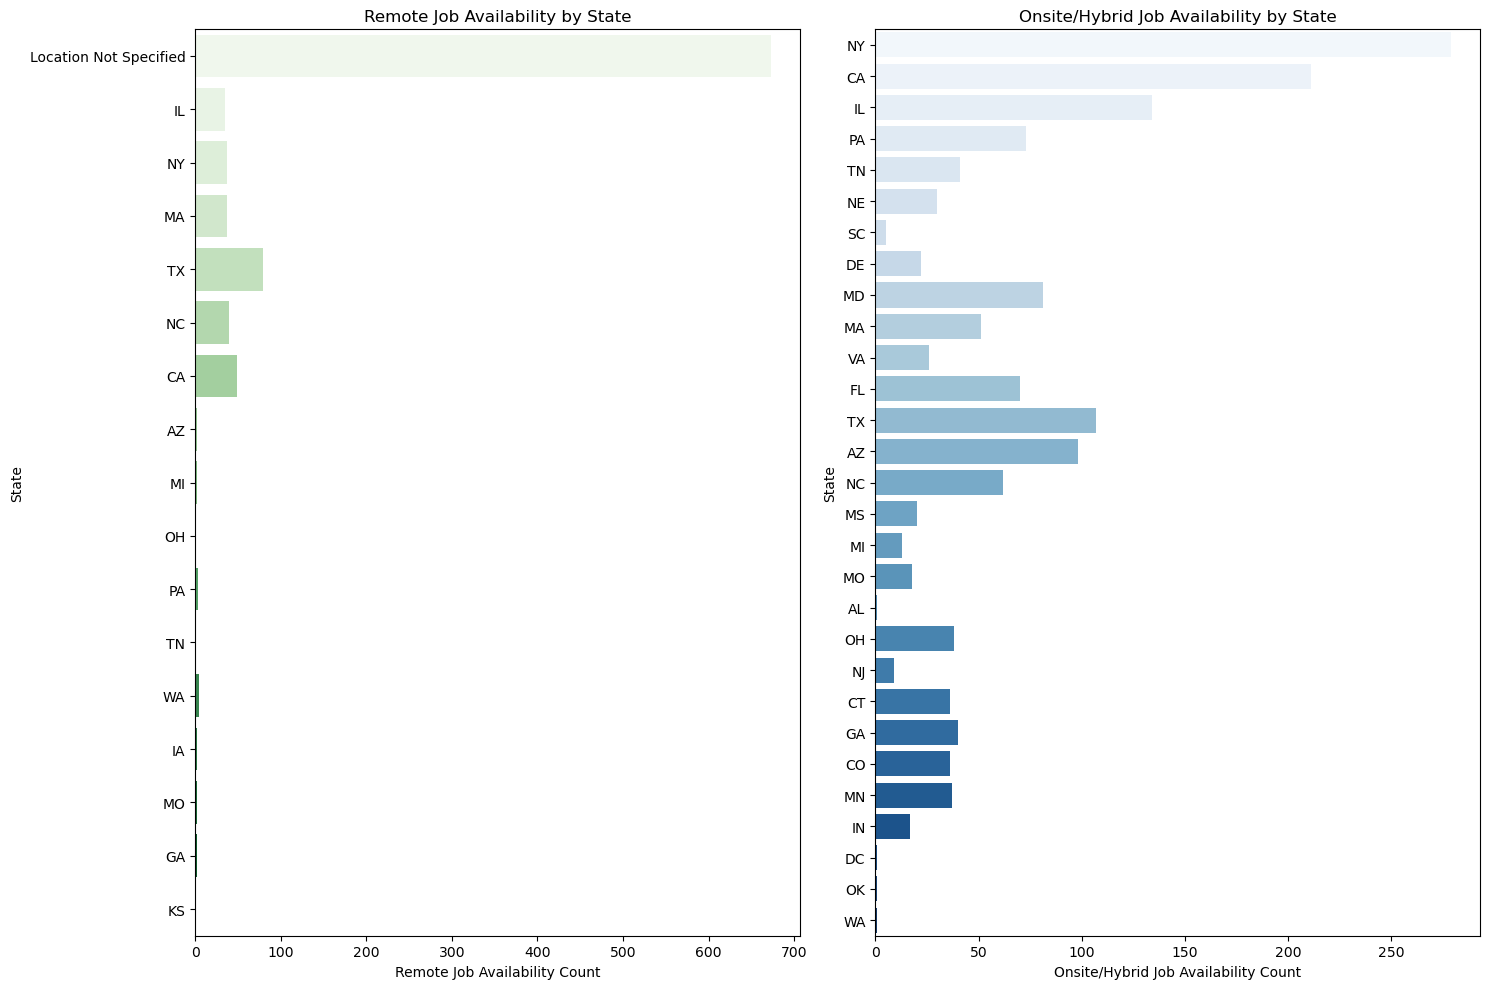

In [ ]:
# Create dummy variables
usa['onsite1'] = usa['onsite_remote'].apply(is_onsite_hybrid)
usa['remote1'] = usa['onsite_remote'].apply(is_remote)

# Convert 'location' column to uppercase
usa['location'] = usa['location'].str.upper()

# Extract the state from the 'location' column
usa['State'] = usa['location'].str.split(', ').str[-1]

# Handling cities mapped to their respective states
city_to_state = {
    'BUFFALO-NIAGARA FALLS AREA': 'NY',
    'SAN JOSE, CA': 'CA',
    ' TEXAS, UNITED STATES': 'TX',
    'ILLINOIS, UNITED STATES': 'IL',
    'CHICAGO, IL': 'IL',
    'GREATER SCRANTON AREA': 'PA',
    'TENNESSEE, UNITED STATES': 'TN',
    'INDIANA, UNITED STATES': 'IN',
    'FRANKLIN, TN': 'TN',
    'WISCONSIN, UNITED STATES': 'WI',
    'VIRGINIA, UNITED STATES': 'VA',
    'OMAHA, NE': 'NE',
    'MOUNT PLEASANT, SC': 'SC',
    'WILMINGTON, DE': 'DE',
    'ANNAPOLIS, MD': 'MD',
    'TIMONIUM, MD': 'MD',
    'QUINCY, MA': 'MA',
    'MANASSAS, VA': 'VA',
    'NEW YORK, NY': 'NY',
    'DELRAY BEACH, FL': 'FL',
    'HOUSTON, TX': 'TX',
    'IRVINE, CA': 'CA',
    'TEMPE, AZ': 'AZ',
    'RALEIGH, NC': 'NC',
    'SCOTTSDALE, AZ': 'AZ',
    'FORT LAUDERDALE, FL': 'FL',
    'PLANO, TX': 'TX',
    'DALLAS, TX': 'TX',
    'SOUTHAVEN, MS': 'MS',
    'ANN ARBOR, MI': 'MI',
    "O'FALLON, MO": 'MO',
    'SAN DIEGO, CA': 'CA',
    'SAN FRANCISCO, CA': 'CA',
    'GEORGIA, AL': 'AL',
    'SANTA CLARA, CA': 'CA',
    'CRYSTAL CITY, VA': 'VA',
    'IRVING, TX': 'TX',
    'COLUMBUS, OH': 'OH',
    'SAN ANTONIO, TX': 'TX',
    'AUSTIN, TX': 'TX',
    'TAMPA, FL': 'FL',
    'BRIDGEWATER, NJ': 'NJ',
    'KNOXVILLE, TN': 'TN',
    'PALO ALTO, CA': 'CA',
    'NASHVILLE, TN': 'TN',
    'PLEASANTON, CA': 'CA',
    'NEW YORK CITY METROPOLITAN AREA': 'NY',
    'BOSTON, MA': 'MA',
    'NEW YORK, UNITED STATES': 'NY',
    'CHARLOTTE, NC': 'NC',
    'CARLSBAD, CA': 'CA',
    'PHOENIX, AZ': 'AZ',
    'SOUTH BARRINGTON, IL': 'IL',
    'DETROIT, MI': 'MI',
    'CINCINNATI, OH': 'OH',
    'MARYLAND, UNITED STATES': 'MD',
    'PITTSBURGH, PA': 'PA',
    'BELLEVUE, WA': 'WA',
    'DES MOINES, IA': 'IA',
    'MICHIGAN, UNITED STATES': 'MI',
    'ARIZONA, UNITED STATES': 'AZ',
    'ATLANTA, GA': 'GA',
    'SUN CITY, KS': 'KS',
    'HOME, MI': 'MI',
    'KANSAS CITY METROPOLITAN AREA': 'MO',
    'ONTARIO, CA': 'CA',
    'CEDAR RAPIDS, IA': 'IA',
    'LOS ANGELES, CA': 'CA',
    'PHILADELPHIA, PA': 'PA',
    'DALLAS-FORT WORTH METROPLEX': 'TX',
    'ALPHARETTA, GA': 'GA',
    'HARTFORD, CT': 'CT',
    'GREATER SACRAMENTO': 'CA',
    'CONSHOHOCKEN, PA': 'PA',
    'NORTH CAROLINA, UNITED STATES': 'NC',
    'SAN FRANCISCO BAY AREA': 'CA',
    'ATLANTA METROPOLITAN AREA': 'GA',
    'GREENSBORO--WINSTON-SALEM--HIGH POINT AREA': 'NC',
    'MORGAN HILL, CA': 'CA',
    'DENVER METROPOLITAN AREA': 'CO',
    'DISTRICT OF COLUMBIA, UNITED STATES': 'DC',
    'MIAMI, FL': 'FL',
    'CINCINNATI METROPOLITAN AREA': 'OH',
    'RICHFIELD, MN': 'MN',
    'PENNSYLVANIA, UNITED STATES': 'PA',
    'MISHAWAKA, IN': 'IN',
    'BURBANK, CA': 'CA',
    'HOFFMAN ESTATES, IL': 'IL',
    'MORRIS PLAINS, NJ': 'NJ',
    'NOVATO, CA': 'CA',
    'QUEENS, NY': 'NY',
    'LOS ANGELES METROPOLITAN AREA': 'CA',
    'GREATER TAMPA BAY AREA': 'FL',
    'WASHINGTON, DC': 'DC',
    'COLUMBIA, SOUTH CAROLINA METROPOLITAN AREA': 'SC',
    'OKLAHOMA CITY, OK': 'OK',
    'MINNEAPOLIS, MN': 'MN',
    'CAMDEN, NJ': 'NJ',
    'EDEN PRAIRIE, MN': 'MN',
    'ORLANDO, FL': 'FL',
    'NEW JERSEY, UNITED STATES': 'NJ',
    'WOODCLIFF LAKE, NJ': 'NJ',
    'CLEVELAND, OH': 'OH',
    'NEW HAVEN, CT': 'CT',
    'DUBLIN, OH': 'OH',
    'HUNTERSVILLE, NC': 'NC',
    'CHARLOTTE METRO': 'NC',
    'OAKBROOK TERRACE, IL': 'IL',
    'MIRAMAR, FL': 'FL',
    'SEATTLE, WA': 'WA',
    'NASHVILLE METROPOLITAN AREA': 'TN',
    'SOUTH CAROLINA METROPOLITAN AREA': 'SC',
    'BIRMINGHAM, AL': 'AL',
 
    
}
 
usa.drop(usa[(usa['State'] == 'UNITED STATES') & (usa['onsite_remote'].isin(['onsite', 'hybrid']))].index, inplace=True)
usa = usa.replace('UNITED STATES', 'Location Not Specified', regex=True)




# Map cities to states
usa['State'] = usa['State'].replace(city_to_state)


usa.drop(usa[usa['State'] == 'United States'].index, inplace=True)

# Plotting
plt.figure(figsize=(15, 10))

# Plot Remote jobs
plt.subplot(1, 2, 1)
sns.countplot(y='State', data=usa[usa['remote1'] == 1], palette='Greens')
plt.xlabel('Remote Job Availability Count')
plt.ylabel('State')
plt.title('Remote Job Availability by State')

# Plot Onsite/Hybrid jobs
plt.subplot(1, 2, 2)
sns.countplot(y='State', data=usa[usa['onsite1'] == 1], palette='Blues')
plt.xlabel('Onsite/Hybrid Job Availability Count')
plt.ylabel('State')
plt.title('Onsite/Hybrid Job Availability by State')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

## OLS Model

In [ ]:
usa = pd.read_csv('linkedin-jobs-usa.csv')
usa.drop(columns=['link'], inplace=True)
usa.dropna(inplace = True)

In [ ]:
usa.head()

,title,company,description,onsite_remote,salary,location,criteria,posted_date
8,Data Analyst,London Approach,The ideal candidate for the Data Analyst/Finan...,onsite,"$100,000.00\r\n -\r\n $1...","Franklin, TN","[{'Seniority level': 'Associate'}, {'Employmen...",2022-11-21
24,Data Analyst,"Eva Garland Consulting, LLC","Reporting to the Director of Operations, the D...",onsite,"$50,000.00\r\n -\r\n $55...","Raleigh, NC","[{'Seniority level': 'Entry level'}, {'Employm...",2022-11-22
35,Data Analyst,London Approach,The ideal candidate for the Data Analyst/Finan...,onsite,"$100,000.00\r\n -\r\n $1...","Franklin, TN","[{'Seniority level': 'Associate'}, {'Employmen...",2022-11-21
61,Data Analyst,London Approach,The ideal candidate for the Data Analyst/Finan...,onsite,"$100,000.00\r\n -\r\n $1...","Franklin, TN","[{'Seniority level': 'Associate'}, {'Employmen...",2022-11-21
88,Data Analyst,London Approach,The ideal candidate for the Data Analyst/Finan...,onsite,"$100,000.00\r\n -\r\n $1...","Franklin, TN","[{'Seniority level': 'Associate'}, {'Employmen...",2022-11-21


In [ ]:
sal = []
sal_converted = []
for salary in usa['salary']:
    value = int(salary.split(".")[0].replace('$', '').replace(',', ''))
    sal.append(value)
    
sal_converted = []
for number in sal:
    if len(str(number)) == 2:
        sal_converted.append(number*2080)
    else:
        sal_converted.append(number)

usa['salary_converted'] = sal_converted

In [ ]:
# Scraping skills from the job description
top_skills = ['sql', ' r ', 'python', 'matlab', 'excel', 'tableau', 'power bi', 'java', 'data visualization', 'data mining', 'statistics', 'machine learning', 'data cleaning', 'data manipulation', 'spark', 'hadoop', 'google analytics', 'aws', 'machine learning', 'qlik', 'data modeling']
for i in top_skills:
    skill = []
    for desc in usa['description']:
        if i in desc.lower():
            skill.append(1)
        else:
            skill.append(0)
    usa[i] = skill





,title,company,description,onsite_remote,salary,location,criteria,posted_date,salary_converted,sql,...,statistics,machine learning,data cleaning,data manipulation,spark,hadoop,google analytics,aws,qlik,data modeling
8,Data Analyst,London Approach,The ideal candidate for the Data Analyst/Finan...,onsite,"$100,000.00\r\n -\r\n $1...","Franklin, TN","[{'Seniority level': 'Associate'}, {'Employmen...",2022-11-21,100000,0,...,0,0,0,0,0,0,0,0,0,0
24,Data Analyst,"Eva Garland Consulting, LLC","Reporting to the Director of Operations, the D...",onsite,"$50,000.00\r\n -\r\n $55...","Raleigh, NC","[{'Seniority level': 'Entry level'}, {'Employm...",2022-11-22,50000,0,...,0,0,0,0,0,0,0,0,0,0
35,Data Analyst,London Approach,The ideal candidate for the Data Analyst/Finan...,onsite,"$100,000.00\r\n -\r\n $1...","Franklin, TN","[{'Seniority level': 'Associate'}, {'Employmen...",2022-11-21,100000,0,...,0,0,0,0,0,0,0,0,0,0
61,Data Analyst,London Approach,The ideal candidate for the Data Analyst/Finan...,onsite,"$100,000.00\r\n -\r\n $1...","Franklin, TN","[{'Seniority level': 'Associate'}, {'Employmen...",2022-11-21,100000,0,...,0,0,0,0,0,0,0,0,0,0
88,Data Analyst,London Approach,The ideal candidate for the Data Analyst/Finan...,onsite,"$100,000.00\r\n -\r\n $1...","Franklin, TN","[{'Seniority level': 'Associate'}, {'Employmen...",2022-11-21,100000,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
import statsmodels.api as sm
y = usa['salary_converted']
X = usa[['sql', 'python', 'matlab', ' r ' , 'excel','tableau', 'power bi', 'java', 'data modeling', 'spark', 'hadoop', 'google analytics', 'aws', 'machine learning', 'qlik']]

# Step 3: Add a constant to the independent variables
X = sm.add_constant(X)

# Step 4: Fit the regression model
model = sm.OLS(y, X).fit()


model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       salary_converted   R-squared:                       0.499
Model:                            OLS   Adj. R-squared:                  0.491
Method:                 Least Squares   F-statistic:                     64.91
Date:                Mon, 13 May 2024   Prob (F-statistic):          2.07e-126
Time:                        15:03:54   Log-Likelihood:                -10452.
No. Observations:                 929   AIC:                         2.093e+04
Df Residuals:                     914   BIC:                         2.101e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             8.396e+04   1552.486     54.084      0.000    8.09e+04     8.7e+04
sql               3207.6858   1462.110      2.194      0.028     338.203    6077.168
python            4736.5783   2324.560      2.038      0.042     174.484    9298.673
matlab            1.629e+04   6142.667      2.653      0.008    4239.222    2.83e+04
 r               -4206.8724   9114.773     -0.462      0.645   -2.21e+04    1.37e+04
excel             -1.63e+04   1487.622    -10.960      0.000   -1.92e+04   -1.34e+04
tableau           1.522e+04   1739.496      8.752      0.000    1.18e+04    1.86e+04
power bi          1.427e+04   1628.655      8.765      0.000    1.11e+04    1.75e+04
java              1.683e+04   4619.733      3.643      0.000    7761.631    2.59e+04
data modeling     4.511e+04   4314.792     10.454      0.000    3.66e+04    5.36e+04
spark             2.659e-12   1.54e-12      1.731      0.084   -3.55e-13    5.67e-12
hadoop            2.236e+04   3701.683      6.039      0.000    1.51e+04    2.96e+04
google analytics -3.113e+04   3674.670     -8.471      0.000   -3.83e+04   -2.39e+04
aws              -1.202e+04   2673.755     -4.494      0.000   -1.73e+04   -6767.642
machine learning  9034.6365   2938.539      3.075      0.002    3267.570    1.48e+04
qlik             -4.049e+04   3016.895    -13.420      0.000   -4.64e+04   -3.46e+04
==============================================================================
Omnibus:                       11.810   Durbin-Watson:                   2.525
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               11.717
Skew:                           0.251   Prob(JB):                      0.00286
Kurtosis:                       2.773   Cond. No.                     1.74e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.37e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### The final regression equation we derived is as follows:

### Salary = 8.42 + 3113.25Xsql + 4668.39Xpython + 2.43Xmatlab - 1.61Xexcel + 1.51Xtableau + 1.41Xpower bi + 1.68Xjava + 4.53Xdata modeling - 1.27Xspark + 2.24Xhadoop - 3.11Xgoogle analytics - 1.22X aws + 9105.28Xmachine learning - 4.05Xqlik
